In [123]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# from catboost import CatBoostClassifier
# import lightgbm as lgb


import plotly.express as px
import plotly.graph_objects as go

sns.set()

In [124]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [125]:
df_v = df.copy()
df_v["HeartDisease"] = df_v["HeartDisease"].map({1:"HeartDisease",0:"No HeartDisease"})
df_v["Sex"] = df_v["Sex"].map({"F":"Female","M":"Male"})

In [126]:
df_v.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Male,ATA,140,289,0,Normal,172,N,0.0,Up,No HeartDisease
1,49,Female,NAP,160,180,0,Normal,156,N,1.0,Flat,HeartDisease
2,37,Male,ATA,130,283,0,ST,98,N,0.0,Up,No HeartDisease
3,48,Female,ASY,138,214,0,Normal,108,Y,1.5,Flat,HeartDisease
4,54,Male,NAP,150,195,0,Normal,122,N,0.0,Up,No HeartDisease


In [127]:
fig = px.sunburst(df_v, path = ["Sex","HeartDisease"],\
                 color="HeartDisease",\
                 color_discrete_map={"HeartDisease":"Red", "No HeartDisease":"Blue",\
                                    "(?)":"Pink"}, title = "Heart Disease - Gender"
                 )

fig.show()

In [128]:
bins = [0,30,50,80]
pd.cut(df.Age, bins = bins)

0      (30, 50]
1      (30, 50]
2      (30, 50]
3      (30, 50]
4      (50, 80]
         ...   
913    (30, 50]
914    (50, 80]
915    (50, 80]
916    (50, 80]
917    (30, 50]
Name: Age, Length: 918, dtype: category
Categories (3, interval[int64]): [(0, 30] < (30, 50] < (50, 80]]

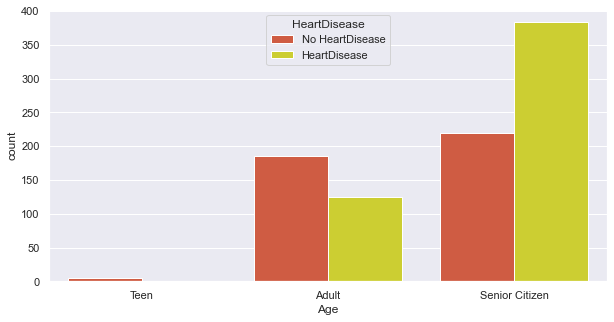

In [129]:
plt.figure(figsize=(10,5))


fig = sns.countplot(x=pd.cut(df_v.Age, bins = bins), hue = df_v.HeartDisease,\
                    palette=["#E64D2C","#E5E818"])
fig.set_xticklabels(["Teen","Adult","Senior Citizen"])

plt.show()

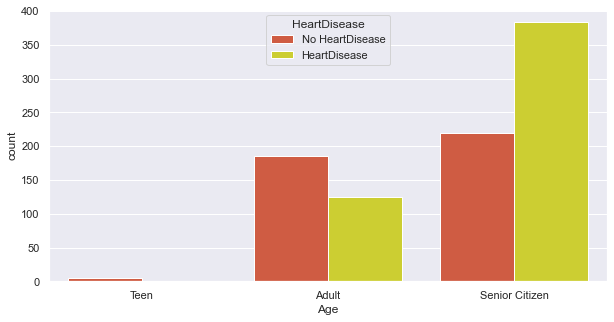

In [130]:
plt.figure(figsize=(10,5))


sns.countplot(x=pd.cut(df_v.Age, bins = bins), hue = df_v.HeartDisease,\
                    palette=["#E64D2C","#E5E818"])
plt.xticks(np.arange(3),["Teen","Adult","Senior Citizen"])

plt.show()

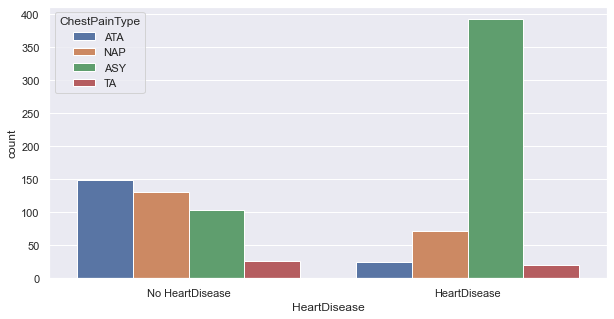

In [131]:
plt.figure(figsize=(10,5))

sns.countplot(x=df_v.HeartDisease, hue = df_v.ChestPainType)
plt.show()

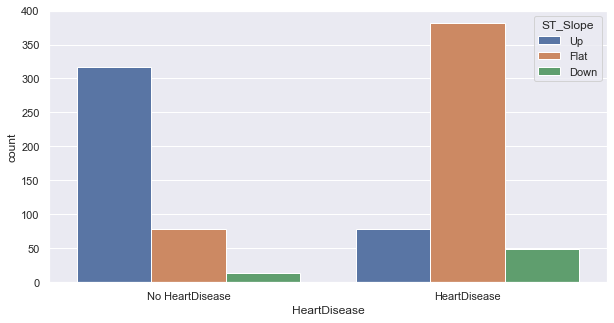

In [132]:
plt.figure(figsize=(10,5))

sns.countplot(x=df_v.HeartDisease, hue = df_v.ST_Slope)
plt.show()

<img src="ST Slope.png" width="70%"/>

# Con: 
    * zyx

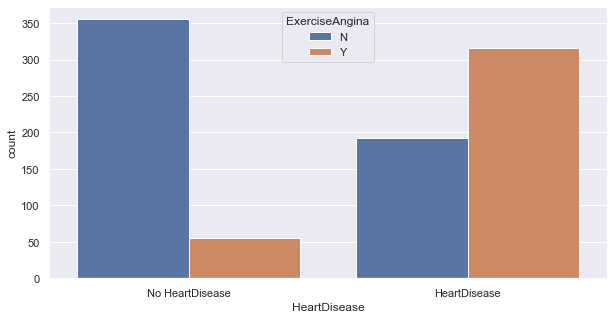

In [133]:
plt.figure(figsize=(10,5))

sns.countplot(x=df_v.HeartDisease, hue = df_v.ExerciseAngina)
plt.show()

<Figure size 1440x720 with 0 Axes>

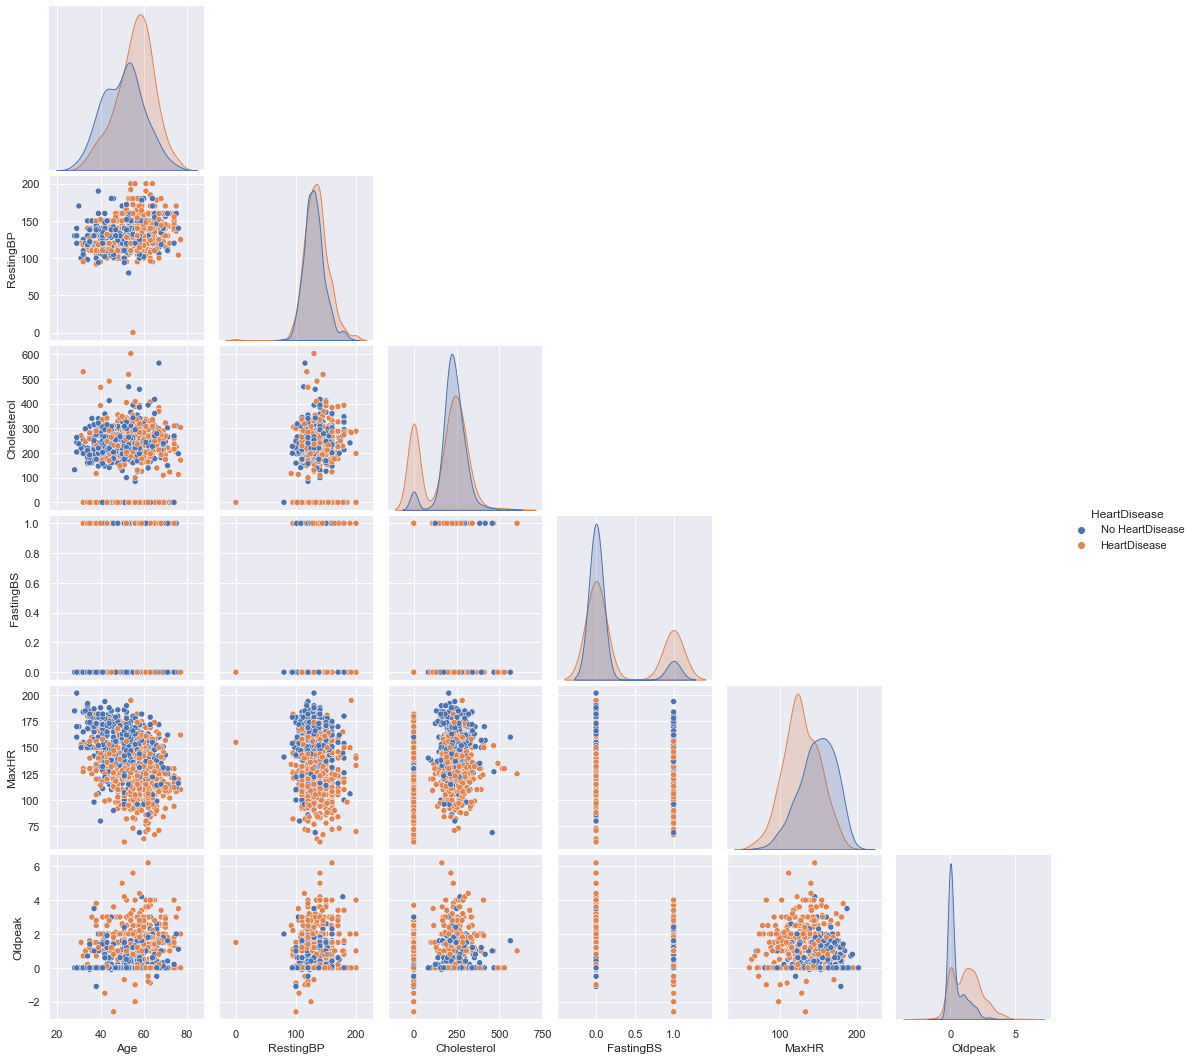

In [134]:
# sns.set(rc={'figure.figsize':(70.7,60.27)})
plt.figure(figsize=(20,10))
sns.pairplot(df_v, hue = "HeartDisease", corner = True)

plt.show()

<AxesSubplot:>

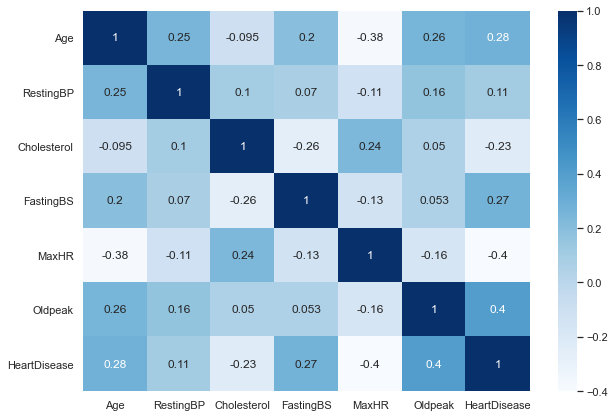

In [135]:
plt.figure(figsize=(10,7))

sns.heatmap(df.corr(), annot = True, cmap = "Blues")

In [136]:
df_e = pd.get_dummies(df)
df_e["HeartDisease"].head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [137]:
X = df_e.drop(["HeartDisease"], axis = 1)
y = df_e["HeartDisease"]

# Normalize

scalar= StandardScaler()
X = scalar.fit_transform(X)

# Spilt
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=40)

In [138]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [139]:
predict = lr.predict(X_train)
y_predict = lr.predict(X_test)

<AxesSubplot:>

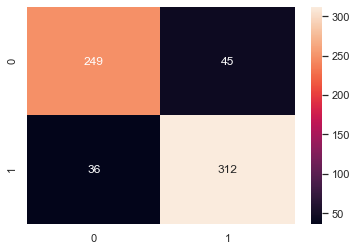

In [140]:
cm = confusion_matrix(y_train, predict)
sns.heatmap(cm, annot=True, fmt="d")

<AxesSubplot:>

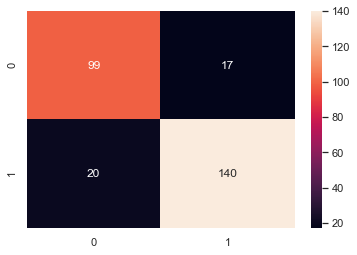

In [141]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")

In [142]:
print("Train")
print(classification_report(y_train,predict))
print("Test")
print(classification_report(y_test,y_predict))

Train
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       294
           1       0.87      0.90      0.89       348

    accuracy                           0.87       642
   macro avg       0.87      0.87      0.87       642
weighted avg       0.87      0.87      0.87       642

Test
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       116
           1       0.89      0.88      0.88       160

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



In [143]:
from sklearn.decomposition import PCA
pca = PCA()

X_pca = pca.fit_transform(X)
X_pca

array([[ 3.09384006e+00, -1.38929352e+00, -3.01527135e-01, ...,
         1.76366238e-15, -7.33392725e-17, -3.44536266e-16],
       [ 1.51750633e+00,  1.78749759e+00, -1.68177226e+00, ...,
        -6.63754216e-16,  1.38513384e-16, -2.53035774e-16],
       [ 1.93033364e+00, -7.81068674e-01,  1.46863858e+00, ...,
        -3.61366045e-16,  1.87947105e-16,  1.30725324e-17],
       ...,
       [-2.39860515e+00, -9.41224258e-01, -1.42343241e+00, ...,
        -1.81850139e-16, -4.67037703e-17, -1.32327541e-17],
       [ 2.15558246e+00,  3.20670726e+00, -3.61737769e-01, ...,
         1.58949863e-16, -1.92192605e-16,  2.75065260e-17],
       [ 2.68467653e+00, -1.53533468e+00,  2.84261147e-01, ...,
        -4.72754854e-17, -6.57085611e-17,  2.26056053e-17]])

In [144]:
eign_ratio = pca.explained_variance_ratio_
eign_ratio_cum = np.cumsum(eign_ratio)

In [145]:
X.shape

(918, 20)

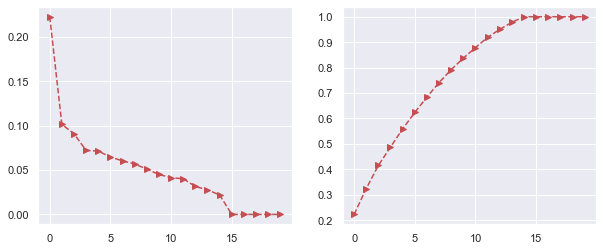

In [146]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(eign_ratio, "r>--")

plt.subplot(1,2,2)
plt.plot(eign_ratio_cum, "r>--")
plt.show()

In [147]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)

X_pca = pca.fit_transform(X)
X_pca.shape

(918, 14)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.3, random_state=40)

In [149]:
lr = LogisticRegression()
rf = RandomForestClassifier(criterion="gini")
lr.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [150]:
predict = lr.predict(X_train)
y_predict = lr.predict(X_test)
len(predict),len(y_train)

(642, 642)

<AxesSubplot:>

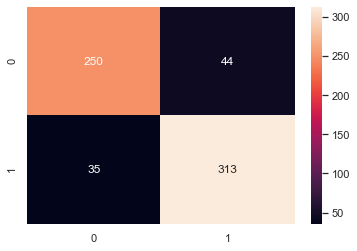

In [151]:
cm = confusion_matrix(y_train, predict)
sns.heatmap(cm, annot=True, fmt="d")

<AxesSubplot:>

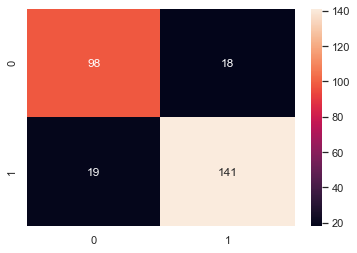

In [152]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")

In [164]:
print("Train")
print(classification_report(y_train,predict))
print("Test")
print(classification_report(y_test,y_predict,"f1-score"))

Train
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       294
           1       0.88      0.90      0.89       348

    accuracy                           0.88       642
   macro avg       0.88      0.87      0.88       642
weighted avg       0.88      0.88      0.88       642

Test


C:\Users\S_Huzaifa_Ali_H\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning:

Pass labels=f1-score as keyword args. From version 0.25 passing these as positional arguments will result in an error



TypeError: iteration over a 0-d array

In [154]:
kfold = StratifiedKFold(n_splits=42)
kfold

StratifiedKFold(n_splits=42, random_state=None, shuffle=False)

In [155]:
# fo i in 
cv_result = cross_val_score(lr, X_pca, y, cv=kfold, scoring="accuracy")
cv_result.mean()

0.8611626468769326

In [156]:
cv_result = cross_val_score(rf, X_pca, y, cv=kfold, scoring="accuracy")
cv_result.mean()

0.8590496804782519

In [157]:
lr = LogisticRegression()
predicted = cross_val_predict(lr, X_pca, y, cv=kfold)
predicted

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,

<AxesSubplot:>

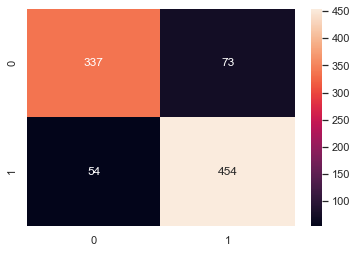

In [158]:
cm = confusion_matrix(y, predicted)
sns.heatmap(cm, annot=True, fmt="d")

In [159]:
print(classification_report(y,predicted))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       410
           1       0.86      0.89      0.88       508

    accuracy                           0.86       918
   macro avg       0.86      0.86      0.86       918
weighted avg       0.86      0.86      0.86       918



In [160]:
Model_RF = RandomForestClassifier(criterion="gini")
kfold = KFold(n_splits=42)
cv_result = cross_val_score(Model_RF, X, y, cv=kfold, scoring="accuracy")
cv_result.mean()

0.8654916512059371

In [161]:
parameters = {"n_estimators": [10,20],
             "max_depth":[5,7,9],
             "min_samples_split":[2,3,5,8],
             "min_samples_leaf":[2,3,4,5],
             "criterion":["entropy","gini"]
             }

In [163]:
clf = GridSearchCV(RandomForestClassifier(),parameters)

# fit and get tuned params_
clf.fit(X,y)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
Model_RF = RandomForestClassifier(min_samples_split = 5,\
                                  n_estimators = 10,\
                                  min_samples_leaf = 5 ,max_depth= 5,criterion="gini")
kfold = KFold(n_splits=42)
cv_result = cross_val_score(Model_RF, X, y, cv=kfold, scoring="accuracy")
cv_result.mean()

0.8622964337250051

In [ ]:
# {"lr":logi,"RF",RandomForestClassifier()}

In [ ]:
col1 = [2,3,4,5]
col2 = [[2,3],[3,4],[6,1]]

In [ ]:
unique = []

for i in col1: # 2
    for j in col2: # [2,3]
        if i in j and j not in unique:
            unique.append(j)    

In [ ]:
unique

[[2, 3], [3, 4]]